In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [3]:
berlin_2019 = pd.read_csv('data/berlin_scrape_results/berlin_2019.csv')
berlin_1999 = pd.read_csv('data/berlin_scrape_results/berlin_1999.csv')

In [4]:
berlin_2019.info()
berlin_2019.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43705 entries, 0 to 43704
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Overall_Place  43705 non-null  int64 
 1   First_Name     43705 non-null  object
 2   Last_Name      43705 non-null  object
 3   Country        43705 non-null  object
 4   SN             43705 non-null  object
 5   Sex            43705 non-null  object
 6   Net_time       43705 non-null  object
 7   Gross_time     43705 non-null  object
 8   split_times    43705 non-null  object
 9   5k             43705 non-null  object
 10  5k_split       43705 non-null  object
 11  10k            43705 non-null  object
 12  10k_split      43705 non-null  object
 13  15k            43705 non-null  object
 14  15k_split      43705 non-null  object
 15  20k            43705 non-null  object
 16  20k_split      43705 non-null  object
 17  HM             43705 non-null  object
 18  HM_split       43705 non-n

,Overall_Place,First_Name,Last_Name,Country,SN,Sex,Net_time,Gross_time,split_times,5k,...,HM,HM_split,25k,25k_split,30k,30k_split,35k,35k_split,40k,40k_split
43700,30730,Joseph,Emas,CAN,18404,M,06:57:29,07:12:47,Split times,5km,...,HM,03:03:52,25km,03:45:18,30km,04:42:41,35km,05:42:30,40km,06:35:21
43701,30731,Hans-Jürgen,Stampe,GER,3745,M,06:57:57,07:53:00,Split times,5km,...,HM,03:14:30,25km,03:55:22,30km,04:48:46,35km,05:41:57,40km,06:35:57
43702,30732,Dietmar,Schultejans,GER,36417,M,06:58:40,06:59:58,Split times,5km,...,HM,03:12:59,25km,03:51:51,30km,04:43:18,35km,05:38:42,40km,06:36:32
43703,30733,Bruno,Cavallini,ITA,15844,M,06:58:43,07:35:17,Split times,5km,...,HM,02:40:08,25km,03:24:20,30km,04:32:14,35km,05:33:00,40km,06:33:43
43704,13238,Maki,Murao,JPN,63886,W,07:02:03,07:13:25,Split times,5km,...,HM,02:57:39,25km,03:47:17,30km,04:46:03,35km,05:42:29,40km,06:39:10


In [5]:
#clean dataframe
berlin_2019.rename(columns={'40k_split':'fourty_split',
                            "35k_split": 'thirty_five_split',
                            '30k_split':'thirty_split',
                            "25k_split": 'twenty_five_split',
                            '20k_split':'twenty_split',
                            "15k_split": 'fifteen_split',
                            '10k_split':'ten_split',
                            "5k_split": 'five_split',
                            "HM_split": 'Half'
                            }, inplace = True)
berlin_2019.drop(columns=['5k','10k','15k','20k','25k','30k','35k','40k','HM','split_times','SN'], inplace=True)
berlin_2019.drop(berlin_2019[berlin_2019.Net_time == 'M'].index, inplace=True)
berlin_2019.drop(berlin_2019[berlin_2019.Net_time == 'W'].index, inplace=True)
berlin_2019.drop(berlin_2019[berlin_2019.Gross_time == 'Certificate'].index, inplace=True)
#def clean_berlin_data(df):

In [6]:
print(type(berlin_2019['twenty_split'][0]))

<class 'str'>


In [7]:
broken = []
for i in berlin_2019['thirty_five_split']:
    if len(i) != 8:
        broken.append(i)
print(broken)
    

[]


In [8]:
def get_seconds(time_str_series):
    # split in hh, mm, ss
    time_lst = []
    try:
        for i in time_str_series:
            hh, mm, ss = i.split(':')
            time_lst.append(int(hh) * 3600 + int(mm) * 60 + int(ss))
    except ValueError:
        return [i, 'is the broken one']
    return time_lst

columns_to_int = ["Net_time","Gross_time","five_split","ten_split","fifteen_split","twenty_split","Half","twenty_five_split","thirty_split","thirty_five_split","fourty_split"]
for i in columns_to_int:
    if type(i) == str:
        berlin_2019[i] = get_seconds(berlin_2019[i])

In [9]:
berlin_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43605 entries, 0 to 43704
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Overall_Place      43605 non-null  int64 
 1   First_Name         43605 non-null  object
 2   Last_Name          43605 non-null  object
 3   Country            43605 non-null  object
 4   Sex                43605 non-null  object
 5   Net_time           43605 non-null  int64 
 6   Gross_time         43605 non-null  int64 
 7   five_split         43605 non-null  int64 
 8   ten_split          43605 non-null  int64 
 9   fifteen_split      43605 non-null  int64 
 10  twenty_split       43605 non-null  int64 
 11  Half               43605 non-null  int64 
 12  twenty_five_split  43605 non-null  int64 
 13  thirty_split       43605 non-null  int64 
 14  thirty_five_split  43605 non-null  int64 
 15  fourty_split       43605 non-null  int64 
dtypes: int64(12), object(4)
memory usage: 6.

In [10]:
berlin_2019.head()

,Overall_Place,First_Name,Last_Name,Country,Sex,Net_time,Gross_time,five_split,ten_split,fifteen_split,twenty_split,Half,twenty_five_split,thirty_split,thirty_five_split,fourty_split
0,1,Kenenisa,Bekele,ETH,M,7301,7301,864,1733,2609,3478,3665,4350,5215,6075,6930
1,2,Birhanu,Legese,ETH,M,7368,7368,865,1733,2609,3478,3665,4350,5213,6062,6960
2,3,Sisay,Lemma,ETH,M,7416,7416,865,1732,2609,3478,3666,4351,5213,6076,7014
3,4,Jonathan,Korir,KEN,M,7605,7605,865,1733,2610,3478,3666,4351,5262,6219,7189
4,5,Felix,Kandie,KEN,M,7687,7687,883,1770,2659,3546,3740,4444,5338,6250,7227


In [11]:
def make_pace_df(df):
    pace_df = pd.DataFrame([df['Sex'], df['Net_time'], df['Overall_Place']]).transpose()
    pace_df['five_split_pace'] = df['five_split']/ 5
    pace_df['ten_split_pace'] = (df['ten_split'] - df['five_split'])/ 5
    pace_df['fifteen_split_pace'] = (df['fifteen_split'] - df['ten_split'])/ 5
    pace_df['twenty_split_pace'] = (df['twenty_split'] - df['fifteen_split'])/ 5
    pace_df['twenty_five_split_pace'] = (df['twenty_five_split'] - df['twenty_split'])/ 5
    pace_df['thirty_pace'] = (df['thirty_split'] - df['twenty_five_split'])/ 5
    pace_df['thirty_five_pace'] = (df['thirty_five_split'] - df['thirty_split'])/ 5
    pace_df['fourty_pace'] = (df['fourty_split'] - df['thirty_five_split'])/ 5
    pace_df['final_two_pace'] = (pace_df['Net_time'] - df['fourty_split'])/2.195
    return pace_df
pace_df = make_pace_df(berlin_2019)
pace_df.iloc[:,3:14].transpose()

,0,1,2,3,4,5,6,7,8,9,...,43695,43696,43697,43698,43699,43700,43701,43702,43703,43704
five_split_pace,172.8,173.0,173.0,173.0,176.6,176.8,176.8,176.6,176.8,176.6,...,510.4,489.0,556.0,507.4,507.6,488.8,528.2,520.6,366.4,433.8
ten_split_pace,173.8,173.6,173.4,173.6,177.4,177.2,177.2,177.4,177.2,177.6,...,537.8,534.2,573.4,508.6,508.2,518.2,550.2,560.6,375.2,478.4
fifteen_split_pace,175.2,175.2,175.4,175.4,177.8,178.0,178.8,178.0,177.8,177.4,...,559.2,563.8,588.6,525.0,525.2,512.6,544.6,551.6,467.4,500.2
twenty_split_pace,173.8,173.8,173.8,173.6,177.4,177.2,178.8,177.4,177.4,177.6,...,567.8,616.8,599.6,526.8,527.0,564.6,578.6,539.2,585.2,565.8
twenty_five_split_pace,174.4,174.4,174.6,174.6,179.6,179.6,182.8,181.0,179.6,179.8,...,609.8,603.2,614.2,590.8,590.6,619.4,622.8,610.2,657.8,749.2
thirty_pace,173.0,172.6,172.4,182.2,178.8,181.6,185.2,185.2,186.8,178.8,...,643.0,628.2,606.4,684.4,684.4,688.6,640.8,617.4,814.8,705.2
thirty_five_pace,172.0,169.8,172.6,191.4,182.4,182.4,185.6,184.8,184.8,182.8,...,631.6,637.0,609.0,666.2,666.2,717.8,638.2,664.8,729.2,677.2
fourty_pace,171.0,179.6,187.6,194.0,195.4,195.8,191.2,194.0,198.6,204.2,...,652.4,658.8,610.0,729.4,729.4,634.2,648.0,694.0,728.6,680.2
final_two_pace,169.020501,185.876993,183.143508,189.52164,209.567198,210.933941,194.077449,201.822323,200.911162,230.068337,...,628.246014,592.710706,556.264237,616.400911,616.400911,605.01139,601.366743,605.01139,683.371298,625.512528


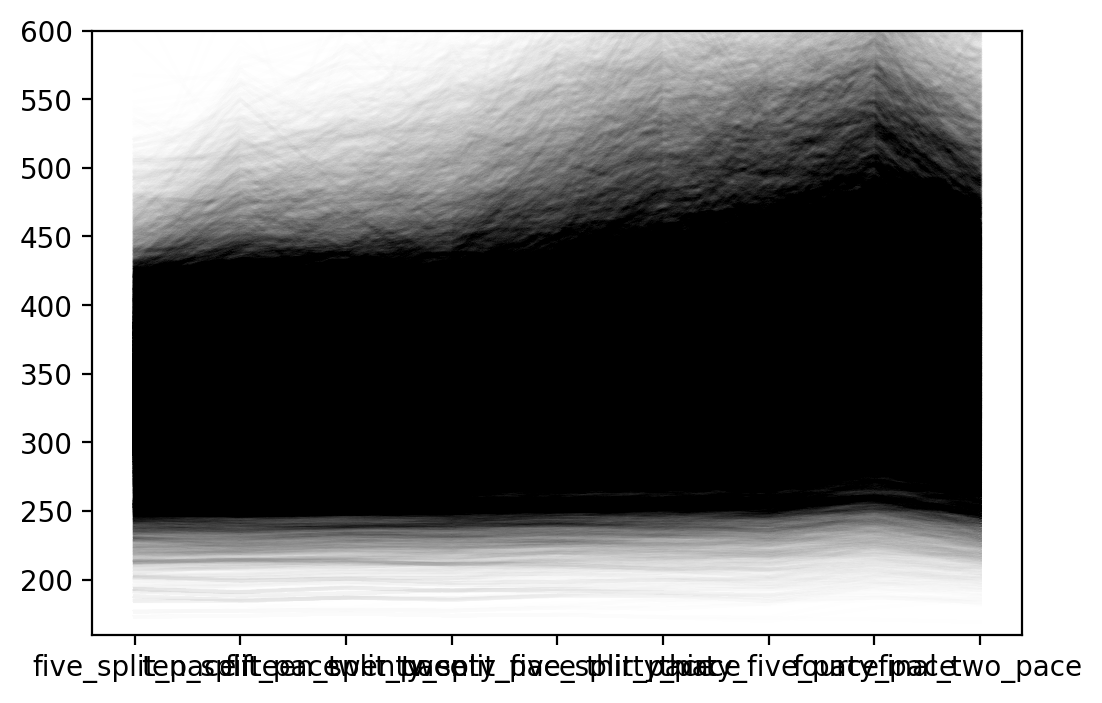

In [12]:
plt.rcParams['figure.dpi'] = 200
ax = sns.lineplot(data= pace_df.iloc[0::,3:14].transpose(), alpha = 0.001, legend=None, dashes= False, 
palette=['black']* (len(pace_df.index)//+1))
ax.set(ylim=(160,600))
plt.show()